# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [274]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata, study_results)
# Display the data table for preview
merged_df.sample(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
656,c282,Placebo,Male,12,27,40,65.021799,2
586,a963,Stelasyn,Female,23,27,40,58.463787,1
130,r554,Capomulin,Female,8,17,25,33.893345,3
1596,u946,Propriva,Male,5,30,10,46.730506,1
1775,x613,Zoniferol,Female,2,29,5,46.097041,0
1715,w575,Zoniferol,Female,16,28,25,58.587322,1
1181,m331,Zoniferol,Female,19,26,5,45.523014,1
442,r921,Ramicane,Female,5,25,5,45.568211,0
1286,o562,Propriva,Female,4,25,25,54.742733,1
1232,n763,Placebo,Female,16,25,15,47.798100,1


In [275]:
# Checking the number of mice
merged_df['Mouse ID'].value_counts


<bound method IndexOpsMixin.value_counts of 0       k403
1       k403
2       k403
3       k403
4       k403
        ... 
1888    z969
1889    z969
1890    z969
1891    z969
1892    z969
Name: Mouse ID, Length: 1893, dtype: object>

In [276]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merged_df.loc[merged_df.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
print(duplicate_mice)

['g989']


In [277]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_df = merged_df.loc[merged_df['Mouse ID'] == 'g989']
duplicate_mice_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0


In [278]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = merged_df[merged_df['Mouse ID'] != 'g989']
#confirm drop has occured
cleaned_df['Mouse ID'].count

<bound method Series.count of 0       k403
1       k403
2       k403
3       k403
4       k403
        ... 
1888    z969
1889    z969
1890    z969
1891    z969
1892    z969
Name: Mouse ID, Length: 1880, dtype: object>

In [279]:
# Checking the number of mice in the clean DataFrame.
cleaned_df['Mouse ID'].value_counts

<bound method IndexOpsMixin.value_counts of 0       k403
1       k403
2       k403
3       k403
4       k403
        ... 
1888    z969
1889    z969
1890    z969
1891    z969
1892    z969
Name: Mouse ID, Length: 1880, dtype: object>

## Summary Statistics

In [280]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
regimen_mean = cleaned_df.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
regimen_tumor_median = cleaned_df.groupby("Drug Regimen").median()['Tumor Volume (mm3)']
regimen_tumor_var = cleaned_df.groupby("Drug Regimen").var()['Tumor Volume (mm3)']
regimen_tumor_std = cleaned_df.groupby("Drug Regimen").std()['Tumor Volume (mm3)']
regimen_tumor_sem = cleaned_df.groupby("Drug Regimen").sem()['Tumor Volume (mm3)']
# Assemble the resulting series into a single summary DataFrame.
summary_stat_df = pd.DataFrame({"Mean Tumor Volume (mm3)": regimen_mean,"Median Tumor Volume (mm3)": regimen_tumor_median, 
                                "Variance Tumor Volume (mm3)": regimen_tumor_var,"StD Tumor Volume (mm3)": regimen_tumor_std, 
                                "SEM Tumor Volume (mm3)": regimen_tumor_sem })
summary_stat_df.head()

,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Variance Tumor Volume (mm3),StD Tumor Volume (mm3),SEM Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [281]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summary_agg =  cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

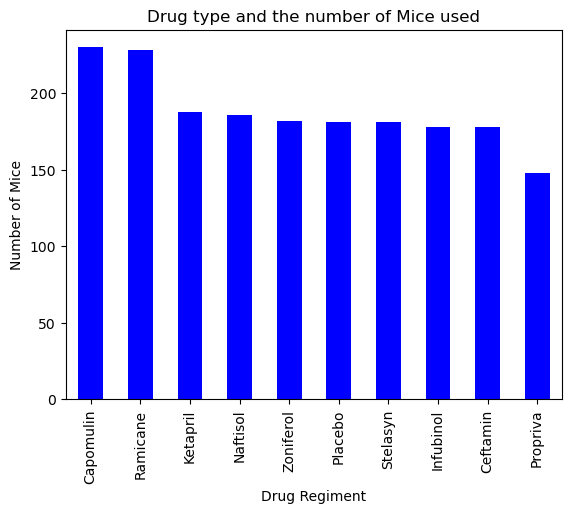

In [282]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drugregimen_count = cleaned_df["Drug Regimen"].value_counts()

panda_bar = drugregimen_count.plot.bar(color='blue')  
plt.xlabel('Drug Regiment')
plt.ylabel('Number of Mice')
plt.title('Drug type and the number of Mice used')
plt.show()

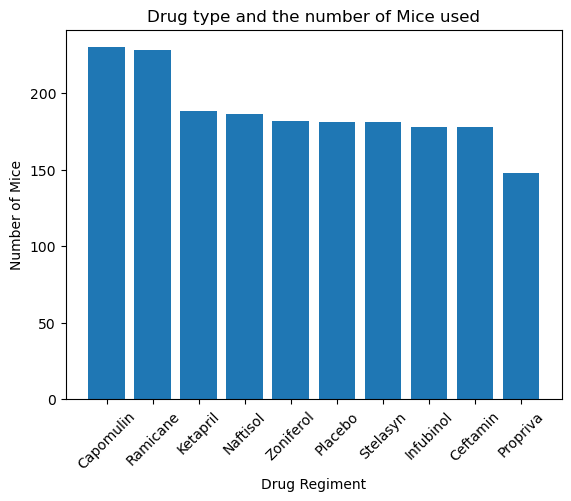

In [283]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = drugregimen_count.index
y_axis = drugregimen_count.values
plt.bar(x_axis, y_axis, align='center')
plt.xticks(rotation='45')
plt.xlabel('Drug Regiment')
plt.ylabel('Number of Mice')
plt.title('Drug type and the number of Mice used')
plt.show()

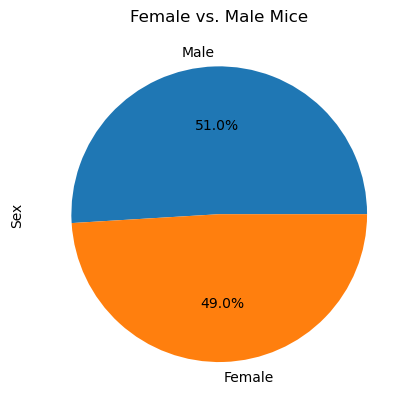

In [284]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_gender = cleaned_df["Sex"].value_counts()
mice_gender.plot.pie(autopct= "%1.1f%%")
plt.title("Female vs. Male Mice")
plt.show()

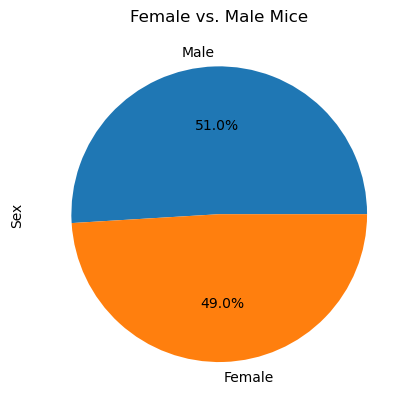

In [285]:
# Generate a pie plot showing the distribution of female versus male mice using Pyplot
plot = mice_gender.plot.pie(autopct="%1.1f%%")
plt.ylabel('Sex')
plt.title("Female vs. Male Mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [340]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mice_group = pd.DataFrame(cleaned_df.groupby('Mouse ID')['Timepoint'].max().sort_values())
mice_group_indexed = mice_group.reset_index().rename(columns={'Timepoint': 'Last Timepoint'})
mice_group_indexed.head()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
combined_df= pd.merge(cleaned_df, mice_group_indexed, on='Mouse ID')
combined_df.sample(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Last Timepoint
156,t565,Capomulin,Female,20,17,5,45.895647,0,45
1740,x336,Naftisol,Female,4,29,0,45.000000,0,0
809,e584,Naftisol,Male,9,27,40,62.816871,4,45
939,i477,Placebo,Female,3,30,10,47.520632,0,10
157,t565,Capomulin,Female,20,17,10,46.749006,0,45
282,l897,Capomulin,Male,17,19,45,38.846876,1,45
736,c895,Infubinol,Female,7,29,0,45.000000,0,30
671,c402,Stelasyn,Female,1,27,5,49.342630,1,45
1439,r157,Capomulin,Male,22,25,0,45.000000,0,15
1794,y163,Infubinol,Female,17,27,15,51.523068,1,45


In [310]:
# Put treatments into a list for for loop (and later for plot labels)
Treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []
# for loop that goes through dataframe finding rows matching treatment list and matching last timepoint
for treatment in Treatments:
    #locate specific rows that match treatment list, and last timepoint, to find its tumor volume 
    regiment = combined_df.loc[combined_df['Drug Regimen'] == treatment]

    timepoint_df = regiment.loc[regiment['Timepoint'] == regiment['Last Timepoint']]

    tumor_volume = timepoint_df['Tumor Volume (mm3)']
    tumor_vol_data.append(tumor_volume)   
    #define IQR variables 
    quartiles = tumor_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    iqr = upperq-lowerq
    print(f'The IQR for {treatment}: {iqr}')

    lowerbound = lowerq - 1.5*iqr
    upperbound = upperq + 1.5*iqr
    print(f'The Upper Bound for {treatment}: {upperbound}')
    print(f'The Lower Bound for {treatment}: {lowerbound}')

    outliers = (tumor_volume.loc[(regiment['Tumor Volume (mm3)'] >= upperbound) | 
                                        (regiment['Tumor Volume (mm3)'] <= lowerbound)]).count()
    print(f'Number of {treatment} outliers: {outliers}')


The IQR for Capomulin: 7.781863460000004
The Upper Bound for Capomulin: 51.83201549
The Lower Bound for Capomulin: 20.70456164999999
Number of Capomulin outliers: 0
The IQR for Ramicane: 9.098536719999998
The Upper Bound for Ramicane: 54.30681135
The Lower Bound for Ramicane: 17.912664470000003
Number of Ramicane outliers: 0
The IQR for Infubinol: 11.477135160000003
The Upper Bound for Infubinol: 82.74144559000001
The Lower Bound for Infubinol: 36.83290494999999
Number of Infubinol outliers: 1
The IQR for Ceftamin: 15.577752179999997
The Upper Bound for Ceftamin: 87.66645829999999
The Lower Bound for Ceftamin: 25.355449580000002
Number of Ceftamin outliers: 0


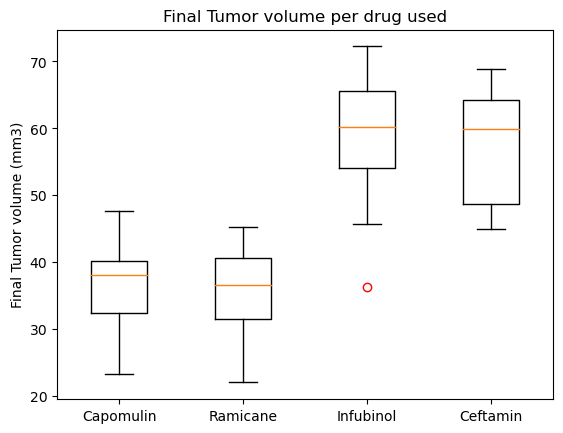

In [328]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data,flierprops=dict(markeredgecolor="red"))
plt.title('Final Tumor volume per drug used')
plt.ylabel('Final Tumor volume (mm3)')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.show()


## Line and Scatter Plots

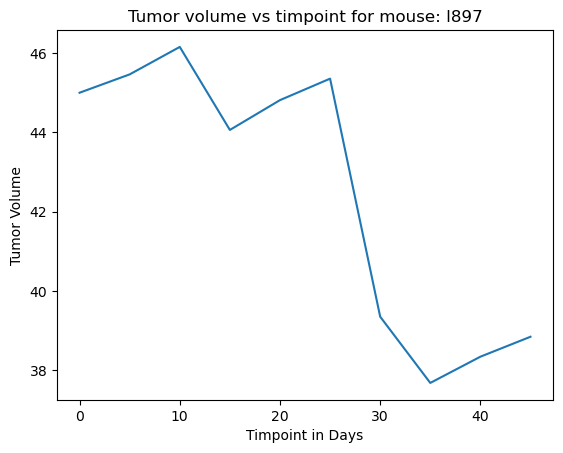

In [346]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse = cleaned_df.loc[cleaned_df['Mouse ID'] == 'l897']
plt.plot(mouse['Timepoint'], mouse['Tumor Volume (mm3)'])
plt.title("Tumor volume vs timpoint for mouse: l897")
plt.ylabel('Tumor Volume')
plt.xlabel('Timpoint in Days')
plt.show()

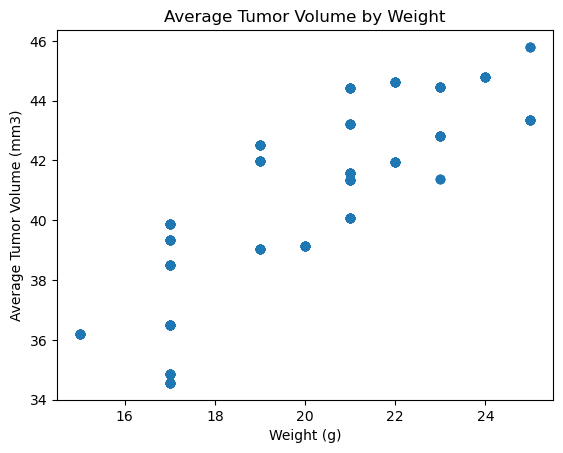

In [360]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_df = cleaned_df.loc[cleaned_df['Drug Regimen'] == 'Capomulin']
tumor_vol_avg = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})

tumor_vol_avg_df = pd.merge(capomulin_df, tumor_vol_avg, on='Mouse ID')
final_avg_vol_df = tumor_vol_avg_df[['Weight (g)', 'avg_tumor_vol']]
final_avg_vol_df


plt.title('Average Tumor Volume by Weight')
plt.scatter(final_avg_vol_df['Weight (g)'],final_avg_vol_df['avg_tumor_vol'])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()



## Correlation and Regression

the correlation is PearsonRResult(statistic=0.8343958614425954, pvalue=6.495737656137799e-61)


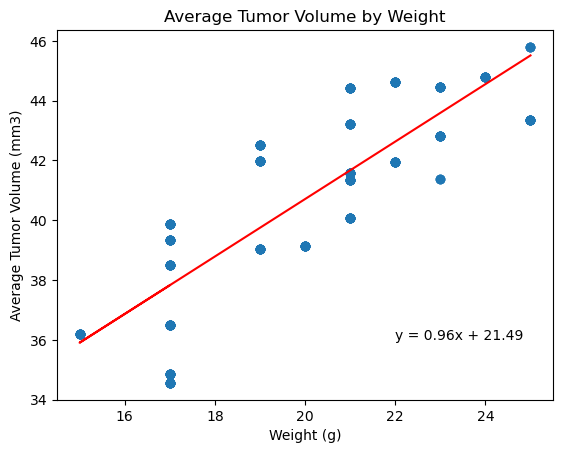

In [378]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(final_avg_vol_df['Weight (g)'], final_avg_vol_df['avg_tumor_vol'])
print(f'the correlation is {correlation}')

from scipy.stats import linregress
(slope, intercept, rvalue, pvalue, stderr) = linregress(final_avg_vol_df['Weight (g)'], final_avg_vol_df['avg_tumor_vol'])
regress_values = final_avg_vol_df['Weight (g)'] * slope + intercept
line_best_fit = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(final_avg_vol_df['Weight (g)'], final_avg_vol_df['avg_tumor_vol'])
plt.plot(final_avg_vol_df['Weight (g)'],regress_values,"r-")

plt.annotate(line_best_fit,(22,36),fontsize=10,color="black")

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
plt.show()